In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import glob
import statistics

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
%load_ext autoreload
%autoreload 2

In [2]:
path = "/home/ubuntu/amine/forecaster/paper_experiments/datasets/ETDataset/ETT-small/ETTm2.csv"
df = pd.read_csv(path)
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 00:15:00,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2,2016-07-01 00:30:00,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
3,2016-07-01 00:45:00,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
4,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
...,...,...,...,...,...,...,...,...
69675,2018-06-26 18:45:00,42.722000,12.230,54.014000,12.652,-11.525,-1.418,45.986500
69676,2018-06-26 19:00:00,38.868000,10.052,49.859001,10.669,-11.525,-1.418,45.986500
69677,2018-06-26 19:15:00,39.622002,11.057,50.448002,11.795,-10.299,-1.418,45.546501
69678,2018-06-26 19:30:00,40.459999,11.392,51.841999,11.929,-11.536,-1.418,45.546501


In [3]:
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,41.130001,12.481,36.535999,9.355,4.424,1.311,38.661999
1,2016-07-01 00:15:00,39.622002,11.309,35.543999,8.551,3.209,1.258,38.223000
2,2016-07-01 00:30:00,38.868000,10.555,34.365002,7.586,4.435,1.258,37.344002
3,2016-07-01 00:45:00,35.518002,9.214,32.569000,8.712,4.435,1.215,37.124001
4,2016-07-01 01:00:00,37.528000,10.136,33.936001,7.532,4.435,1.215,37.124001
...,...,...,...,...,...,...,...,...
69675,2018-06-26 18:45:00,42.722000,12.230,54.014000,12.652,-11.525,-1.418,45.986500
69676,2018-06-26 19:00:00,38.868000,10.052,49.859001,10.669,-11.525,-1.418,45.986500
69677,2018-06-26 19:15:00,39.622002,11.057,50.448002,11.795,-10.299,-1.418,45.546501
69678,2018-06-26 19:30:00,40.459999,11.392,51.841999,11.929,-11.536,-1.418,45.546501


In [4]:
df.columns.to_list().remove("date")

In [5]:
from sklearn.model_selection import TimeSeriesSplit
from train import allRegressors
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)


In [6]:
for i, (train_index, test_index) in enumerate(tscv.split(data)):
    print(len(train_index))
    print(len(test_index))

NameError: name 'data' is not defined

In [7]:
from statsmodels.tsa.arima.model import ARIMA
m = ARIMA([0,1,2,3,4,5,6])

In [7]:
dir(m)

NameError: name 'm' is not defined

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from train import allRegressors
cols = df.columns.to_list()
print(cols)
cols.remove("date")
print(cols)
data = df[cols].copy() 
n_splits = 3
tscv = TimeSeriesSplit(n_splits=n_splits)
res = []
x_cols = cols[:] 
x_cols.remove("OT")
X = df[x_cols]
y = df["OT"]
res = []
for i, (train_index, test_index) in enumerate(tscv.split(data)):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    print(X_test.shape)
    res.append(allRegressors(X_train, X_test, y_train, y_test,run_id=i))

['date', 'HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']
['HUFL', 'HULL', 'MUFL', 'MULL', 'LUFL', 'LULL', 'OT']
(17420, 6)
LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1)
y_true shape (17420,) 
LinearRegression with metric rmse = 32.146419018868244
LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1)
y_true shape (17420,) 
LinearRegression with metric mse = 1033.3922557366539
LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1)
y_true shape (17420,) 
LinearRegression with metric mae = 26.567914044895083
LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1)
y_true shape (17420,) 
LinearRegression with metric mape = 7336772677461.467
LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1)
y_true shape (17420,) 
LinearRegression with metric wmape = 1.121794869213046
LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1)
y_true shape (17420,) 
LinearRegression with metric nrmse = 1.3573398294650152
LinearRegression(n_jobs=-1)
LinearRegression(n_jobs=-1)
1000
y_true s

In [53]:
print(X)

            HUFL    HULL       MUFL    MULL    LUFL   LULL
0      41.130001  12.481  36.535999   9.355   4.424  1.311
1      39.622002  11.309  35.543999   8.551   3.209  1.258
2      38.868000  10.555  34.365002   7.586   4.435  1.258
3      35.518002   9.214  32.569000   8.712   4.435  1.215
4      37.528000  10.136  33.936001   7.532   4.435  1.215
...          ...     ...        ...     ...     ...    ...
69675  42.722000  12.230  54.014000  12.652 -11.525 -1.418
69676  38.868000  10.052  49.859001  10.669 -11.525 -1.418
69677  39.622002  11.057  50.448002  11.795 -10.299 -1.418
69678  40.459999  11.392  51.841999  11.929 -11.536 -1.418
69679  43.223999  12.146  54.737000  12.679 -11.536 -1.418

[69680 rows x 6 columns]


In [54]:
print(y)

0        38.661999
1        38.223000
2        37.344002
3        37.124001
4        37.124001
           ...    
69675    45.986500
69676    45.986500
69677    45.546501
69678    45.546501
69679    45.327000
Name: OT, Length: 69680, dtype: float64


In [7]:
res

NameError: name 'res' is not defined

In [9]:
dfs = [r[0] for r in res]

In [ ]:
dfs[2]

NameError: name 'dfs' is not defined

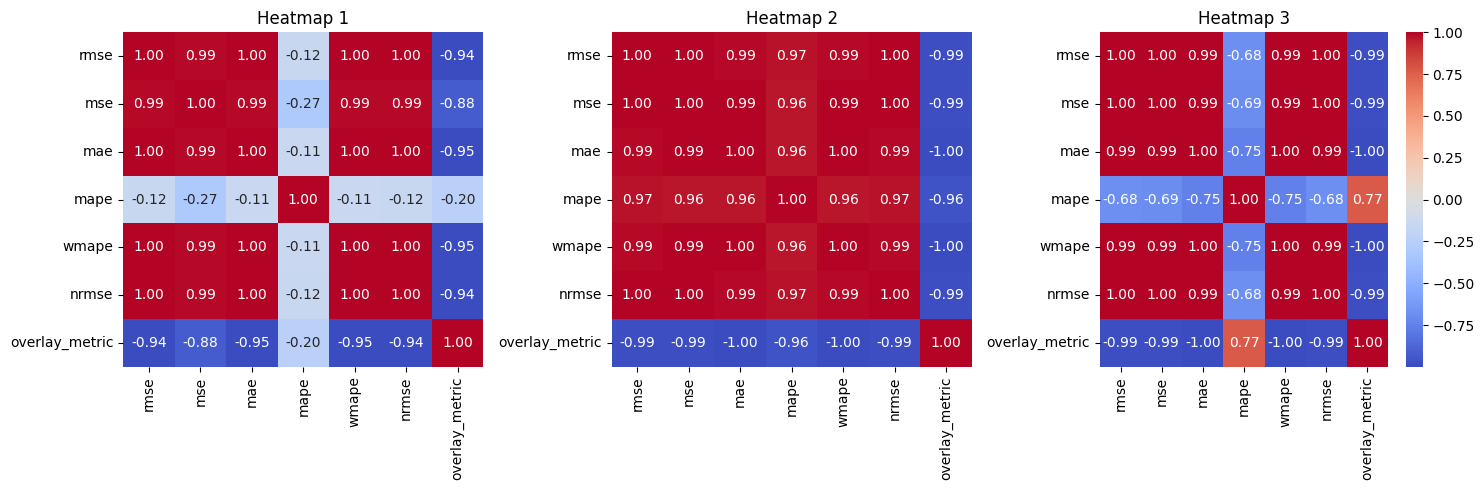

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
num_dfs = len(dfs)
fig, axes = plt.subplots(1, num_dfs, figsize=(5 * num_dfs, 5))
for i,df in enumerate(dfs):
    corr_matrix = df.corr()
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        fmt='.2f',
        ax=axes[i],
        cbar=(i == num_dfs - 1)  # Show cbar only for the last subplot
    )
    axes[i].set_title(f"Heatmap {i+1}")

plt.tight_layout()
plt.show()
    

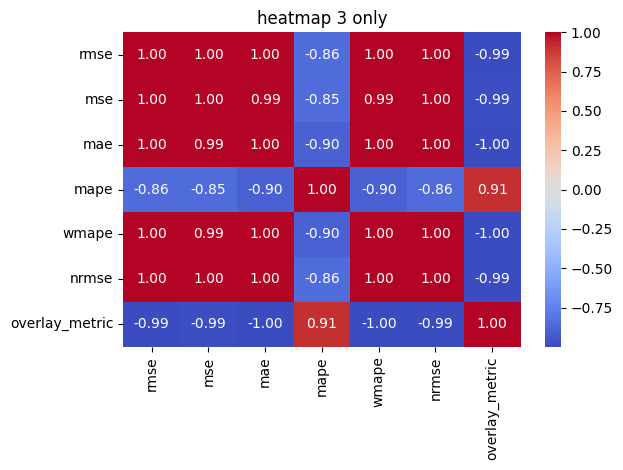

In [12]:
# heatmap 3 only
corr_matrix = df.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
)
plt.title("heatmap 3 only")
plt.tight_layout()
plt.show()
    

In [11]:
predictions = [r[2] for r in res]

(17420,)
(17420,)
(17420, 7)


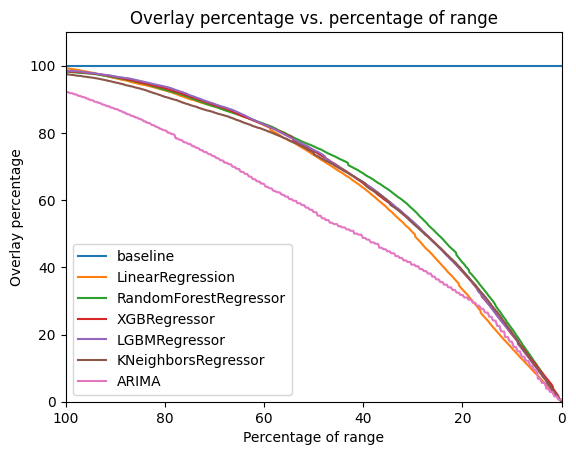

In [12]:
import sys
import os
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from regressors_config import regressors_configs
sys.path.append(os.path.abspath(".."))
from src.processing_forecasts.metrics import Evaluate
df_overlay = {}
prediction = predictions[2]["rmse"]
df_overlay["baseline"] = prediction["LinearRegression"]["y_true"]
print(df_overlay["baseline"].shape)
print(prediction["LinearRegression"]["y_pred"].shape) 
for model in prediction:
    df_overlay[model] = prediction[model]["y_pred"]

df_overlay = pd.DataFrame(df_overlay)
print(df_overlay.shape)

metric_exp = Evaluate(target_values=list(df_overlay["baseline"]),prediction=None).overlay_dx_visualisation_df(forecasts_df=df_overlay,max_percentage=100,min_percentage=0,step=0.1)




 

In [65]:
17420*3

52260

In [12]:
from generate_fake_patterns import generate_pred_plots_for_fake_cases
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


pattern_name: constant

            pred_name : perfect,
            baseline : [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 10

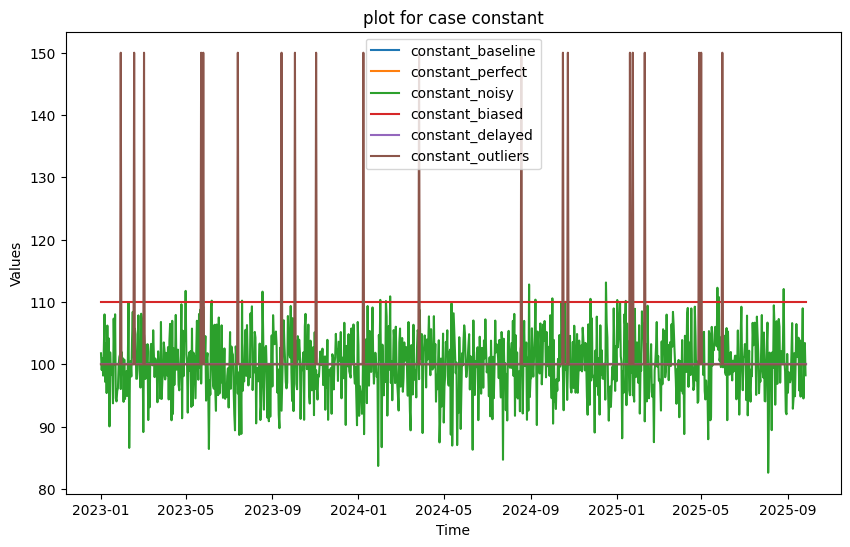

pattern_name: linear_trend

            pred_name : perfect,
            baseline : [  0.           0.1001001    0.2002002    0.3003003    0.4004004
   0.5005005    0.6006006    0.7007007    0.8008008    0.9009009
   1.001001     1.1011011    1.2012012    1.3013013    1.4014014
   1.5015015    1.6016016    1.7017017    1.8018018    1.9019019
   2.002002     2.1021021    2.2022022    2.3023023    2.4024024
   2.5025025    2.6026026    2.7027027    2.8028028    2.9029029
   3.003003     3.1031031    3.2032032    3.3033033    3.4034034
   3.5035035    3.6036036    3.7037037    3.8038038    3.9039039
   4.004004     4.1041041    4.2042042    4.3043043    4.4044044
   4.5045045    4.6046046    4.7047047    4.8048048    4.9049049
   5.00500501   5.10510511   5.20520521   5.30530531   5.40540541
   5.50550551   5.60560561   5.70570571   5.80580581   5.90590591
   6.00600601   6.10610611   6.20620621   6.30630631   6.40640641
   6.50650651   6.60660661   6.70670671   6.80680681   6.90690691
  

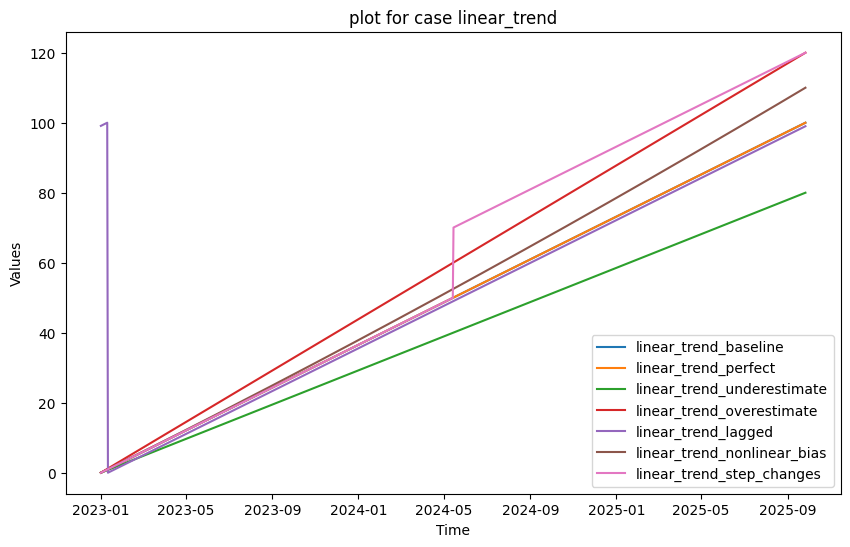

pattern_name: seasonal

            pred_name : perfect,
            baseline : [50.         50.37735854 50.75465736 51.13183678 51.50883711 51.8855987
 52.26206194 52.63816725 53.01385514 53.38906614 53.76374091 54.13782014
 54.51124465 54.88395536 55.2558933  55.6269996  55.99721556 56.36648259
 56.73474226 57.10193631 57.46800663 57.83289531 58.19654461 58.55889698
 58.9198951  59.27948184 59.63760031 59.99419384 60.34920601 60.70258065
 61.05426184 61.40419394 61.75232158 62.09858967 62.44294343 62.78532837
 63.12569031 63.46397541 63.80013012 64.13410127 64.46583601 64.79528186
 65.12238667 65.44709871 65.76936658 66.0891393  66.40636626 66.72099729
 67.03298258 67.34227279 67.64881896 67.95257259 68.25348563 68.55151046
 68.84659992 69.13870732 69.42778645 69.71379156 69.9966774  70.2763992
 70.55291271 70.82617418 71.09614037 71.36276856 71.62601657 71.88584273
 72.14220595 72.39506565 72.64438183 72.89011503 73.13222638 73.37067757
 73.60543086 73.83644912 74.06369578 74.287134

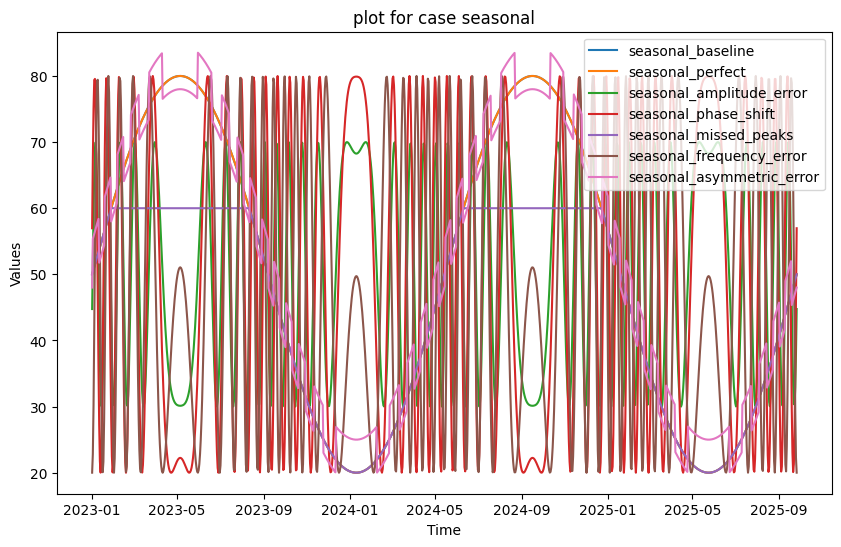

pattern_name: random_walk

            pred_name : perfect,
            baseline : [ 1.41007296e-03  1.11880706e-01  1.76168439e-02  2.72759256e-02
  8.25231521e-02  7.72512769e-02  1.06258104e-01  1.04971525e-01
  5.13292543e-02  1.01561147e-01 -1.24149329e-02  6.69662353e-02
  1.75311448e-01  2.73648274e-01  2.13959603e-01  3.01093895e-01
  2.94449389e-01  2.02388008e-01  6.45426707e-02 -3.33546431e-02
  1.91309147e-01  2.26307965e-01  1.33252532e-01  5.64575345e-02
  1.32301326e-01  1.63144177e-01  1.33539831e-01  3.53096685e-01
  2.05245502e-01  1.32569139e-01 -4.15901626e-03 -1.49524361e-01
 -2.38640610e-01 -2.14422354e-01 -3.66839516e-01 -3.41995452e-01
 -3.57893119e-01 -1.30083502e-01 -9.49168317e-02 -1.18614058e-02
 -1.27220866e-01 -6.05686032e-02 -8.24440218e-02  2.74768187e-02
  7.08820346e-02  2.49863467e-01  4.39472851e-01  3.37637661e-01
  3.60784410e-01  2.68401961e-01  1.50314757e-01  1.96889523e-01
  3.29076596e-01  4.16228135e-01  4.87686418e-01  5.04456011e-01
  5.405

/home/ubuntu/amine/forecaster/paper_experiments/generate_fake_patterns.py:366: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  'smoothed': lambda x: pd.Series(x).rolling(5).mean().fillna(method='bfill'),


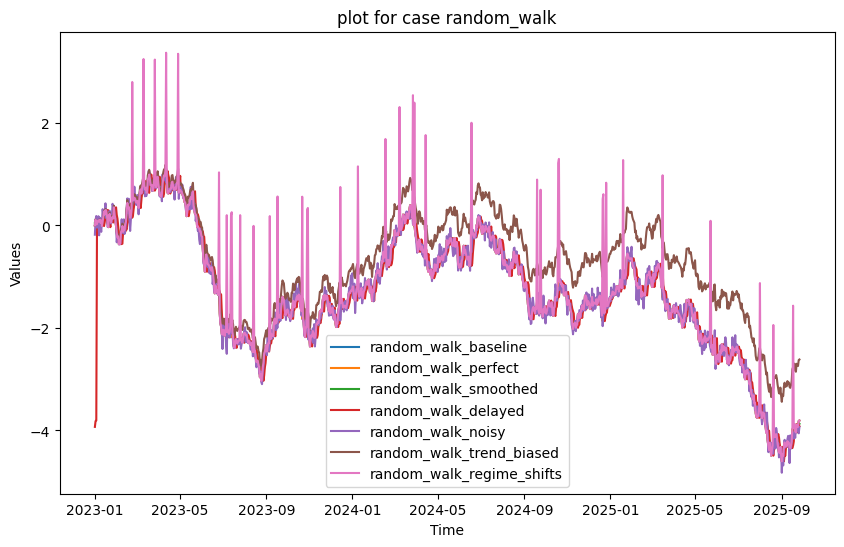

pattern_name: multiple_seasonality

            pred_name : perfect,
            baseline : [50.         51.13096144 52.25506934 53.36552296 54.45562675 55.51884192
 56.54883685 57.53953576 58.48516557 59.38030028 60.21990273 60.99936332
 61.71453544 62.36176728 62.93792985 63.4404409  63.86728466 64.21702712
 64.48882689 64.6824414  64.79822848 64.83714331 64.80073071 64.69111288
 64.51097269 64.26353257 63.95252926 63.58218458 63.15717244 62.68258231
 62.16387952 61.60686262 61.0176182  60.40247341 59.76794667 59.1206969
 58.46747163 57.81505446 57.17021223 56.53964228 55.92992034 55.34744927
 54.79840923 54.28870946 53.82394232 53.4093396  53.04973184 52.74951052
 52.51259389 52.34239629 52.24180148 52.21314    52.25817095 52.37806804
 52.57341028 52.84417728 53.18974912 53.60891098 54.09986227 54.66023038
 55.28708884 55.97697973 56.72594033 57.52953352 58.38288199 59.28070582
 60.21736317 61.18689377 62.18306492 63.19941957 64.22932617 65.2660298
 66.3027044  67.33250539 68.348622

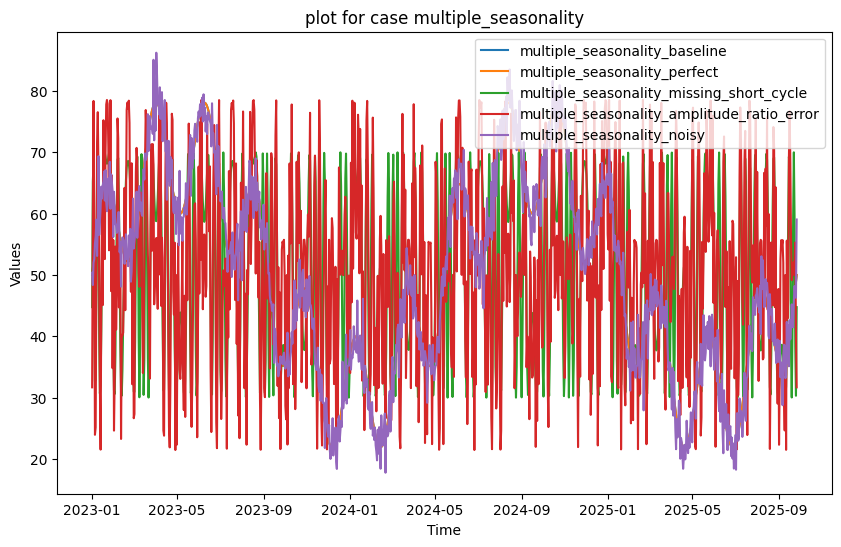

pattern_name: trend_change

            pred_name : perfect,
            baseline : [ 0.          0.1002004   0.2004008   0.3006012   0.4008016   0.501002
  0.6012024   0.70140281  0.80160321  0.90180361  1.00200401  1.10220441
  1.20240481  1.30260521  1.40280561  1.50300601  1.60320641  1.70340681
  1.80360721  1.90380762  2.00400802  2.10420842  2.20440882  2.30460922
  2.40480962  2.50501002  2.60521042  2.70541082  2.80561122  2.90581162
  3.00601202  3.10621242  3.20641283  3.30661323  3.40681363  3.50701403
  3.60721443  3.70741483  3.80761523  3.90781563  4.00801603  4.10821643
  4.20841683  4.30861723  4.40881764  4.50901804  4.60921844  4.70941884
  4.80961924  4.90981964  5.01002004  5.11022044  5.21042084  5.31062124
  5.41082164  5.51102204  5.61122244  5.71142285  5.81162325  5.91182365
  6.01202405  6.11222445  6.21242485  6.31262525  6.41282565  6.51302605
  6.61322645  6.71342685  6.81362725  6.91382766  7.01402806  7.11422846
  7.21442886  7.31462926  7.41482966  7.51

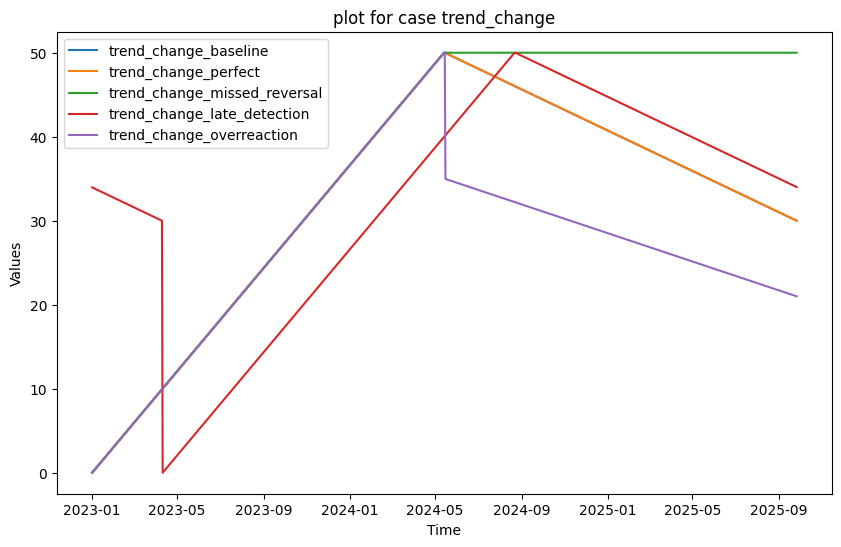

pattern_name: cyclic_with_trend

            pred_name : perfect,
            baseline : [-2.00000000e+01 -1.98198198e+01 -1.96396396e+01 -1.94594595e+01
 -1.92792793e+01 -1.90990991e+01 -1.89189189e+01 -1.87387387e+01
 -1.85585586e+01 -1.83783784e+01 -1.81981982e+01 -1.80180180e+01
 -1.78378378e+01 -1.76576577e+01 -1.74774775e+01 -1.72972973e+01
 -1.71171171e+01 -1.69369369e+01 -1.67567568e+01 -1.65765766e+01
 -1.63963964e+01 -1.62162162e+01 -1.60360360e+01 -1.58558559e+01
 -1.56756757e+01 -1.54954955e+01 -1.53153153e+01 -1.51351351e+01
 -1.49549550e+01 -1.47747748e+01 -1.45945946e+01 -1.44144144e+01
 -1.42342342e+01 -1.40540541e+01 -1.38738739e+01 -1.36936937e+01
 -1.35135135e+01 -1.33333333e+01 -1.31531532e+01 -1.29729730e+01
 -1.27927928e+01 -1.26126126e+01 -1.24324324e+01 -1.22522523e+01
 -1.20720721e+01 -1.18918919e+01 -1.17117117e+01 -1.15315315e+01
 -1.13513514e+01 -1.11711712e+01 -1.09909910e+01 -1.08108108e+01
 -1.06306306e+01 -1.04504505e+01 -1.02702703e+01 -1.00900901e+01
 

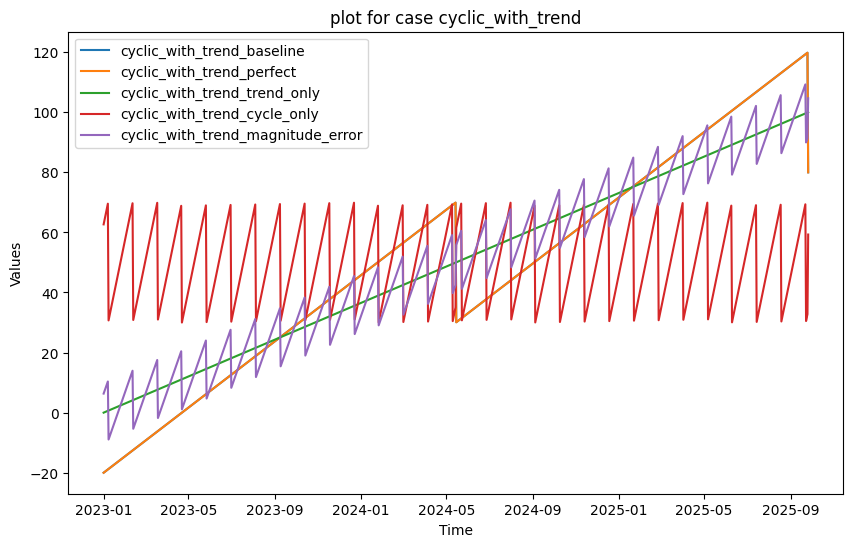

pattern_name: exponential_growth

            pred_name : perfect,
            baseline : [1.         1.0010015  1.00200401 1.00300752 1.00401203 1.00501755
 1.00602408 1.00703161 1.00804016 1.00904971 1.01006028 1.01107186
 1.01208445 1.01309805 1.01411267 1.01512831 1.01614496 1.01716263
 1.01818132 1.01920103 1.02022176 1.02124352 1.0222663  1.0232901
 1.02431493 1.02534078 1.02636766 1.02739557 1.02842451 1.02945448
 1.03048548 1.03151751 1.03255058 1.03358468 1.03461982 1.03565599
 1.0366932  1.03773145 1.03877074 1.03981108 1.04085245 1.04189487
 1.04293833 1.04398283 1.04502838 1.04607498 1.04712263 1.04817132
 1.04922107 1.05027186 1.05132371 1.05237662 1.05343057 1.05448559
 1.05554166 1.05659878 1.05765697 1.05871622 1.05977652 1.06083789
 1.06190032 1.06296382 1.06402838 1.06509401 1.0661607  1.06722846
 1.06829729 1.0693672  1.07043817 1.07151021 1.07258333 1.07365753
 1.0747328  1.07580915 1.07688657 1.07796508 1.07904466 1.08012533
 1.08120707 1.08228991 1.08337382 1.0844

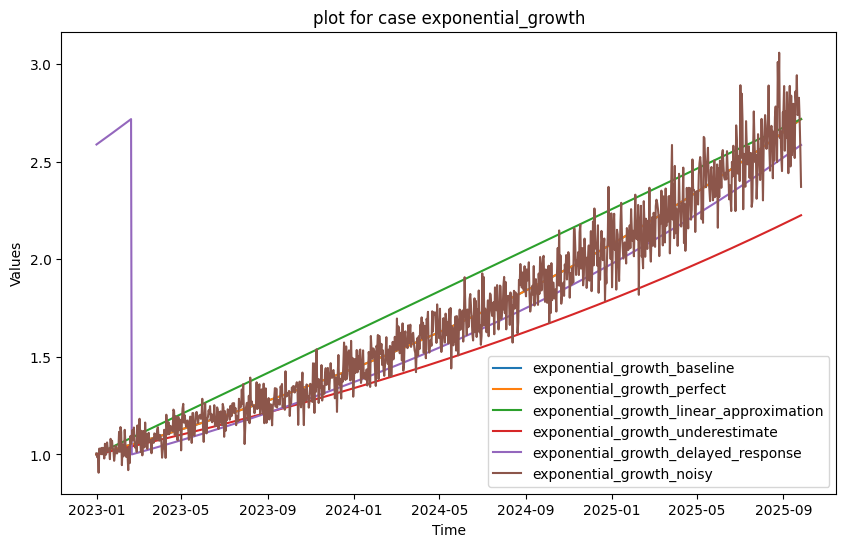

In [13]:
generate_pred_plots_for_fake_cases()